In [88]:
#1.Flowchart
#输入数据
a=int(input("a="))
b=int(input("b="))
c=int(input("c="))
#根据流程图进行条件判断
if a>b :
    if b>c:
        print(a+b-10*c)
    elif a>c:
        print(a+c-10*b)
    else:
        print(c+a-10*b)
elif b>c:
    print("blank")
else:
    print(c+b-10*a)

a= 5
b= 15
c= 10


blank


In [89]:
#2.Continuous celing function
#定义ceil
def ceil(x):
    return x-x%1+1
#定义F(x)
def F(x):
    #假设list的元素都为正整数，在此不再筛选为负数、非整数的情况
    if x==1:
        return 1
    else:
        return F(ceil(x/3))+2*x
#建立list
list=[2,13,7,10,1]
#建立循环，输出结果
for x in list:
     print(F(x))

5
41.0
25.0
33.0
1


In [114]:
#3
#3.1
#我原本的思路是，让x在10到60之间循环，连续减掉10次随机1到6之间的整数，当x=0时，记一次，最终求得每个x的次数。
#但这个代码太多嵌套循环了，难以编写
#最终使用了deepseek建议的动态规划法
def Find_number_of_ways(x):
    # 使用动态规划方法
    # dp[i][j] 表示使用前i个骰子得到和为j的方法数
    dp = [[0] * (x + 1) for _ in range(11)]   
    # 初始化：使用1个骰子时，1-6各有一种方法
    for j in range(1, 7):
        if j <= x:
            dp[1][j] = 1
    # 填充动态规划表
    for i in range(2, 11):  # 从第2个骰子到第10个骰子
        for j in range(1, x + 1):  # 所有可能的和
            # 当前骰子可以掷出1-6，所以从j-6到j-1的范围内累加
            for k in range(1, 7):
                if j - k >= 0:
                    dp[i][j] += dp[i-1][j-k]
    return dp[10][x]
#测试
Find_number_of_ways(11)

10

In [95]:
#3.2
for x in range(10,61):
    if x == 10:
        Number_of_ways = [Find_number_of_ways(x)]
    else:
        Number_of_ways = Number_of_ways + [Find_number_of_ways(x)]
print(Number_of_ways)
print(Number_of_ways.index(max(Number_of_ways))+10)

[1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
35


In [96]:
#4. Dynamic programming
#4.1
#导入生成随机整数的函数randint，这一函数的使用求助了deepseek
from random import randint
#定义函数Random_integer
def Random_integer(N):
    #创建N次循环
    for i in range(1,N+1):
        #创建条件函数，否则会出现list没有定义的报错
        if i == 1:
            #随机生成0到10的整数
            list=[randint(0,10)]
        else:
            list=list+[randint(0,10)]
    return list
#测试
Random_integer(5)

[2, 0, 3, 5, 9]

In [102]:
#4.2
#核心思路：对于数列子集有这样一个规律：每个元素出现的次数是一样的，并且这个次数可以用公式表示出来
#定义sum_all()函数，求出数列所有元素之和

def sum_all(list):
    y = 0
    for x in range(0,len(list)):
        y = y + list[x]
    return y
#定义sum_ave_min函数，求出每一种子集（子集元素个数相同视为一种）平均数之和
#这里的math.factorial()是求阶乘，这一函数的使用求助了deepseek
import math
def sum_ave_min(v):
    return sum_all(list)*math.factorial(len(list)-1)/math.factorial(v-1)/math.factorial(len(list)-v)/v
#已经求得了每一种子集之和，最后只需用循环将每一种加起来，即得到最终结果
def Sum_averages(list):
    q=0
    for v in range(1,len(list)+1):
       q = sum_ave_min(v) + q
    return q
#测试
list=[1,2,3]
Sum_averages(list)

14.0

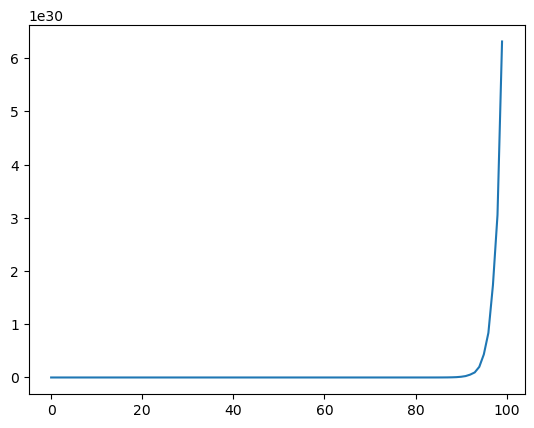

In [105]:
#4.3
for N in range(1,101):
    #先在此定下list，否则后面使用Random_integer(N)会出现再一次随机生成
    list=Random_integer(N)
    if N == 1:
        Total_sum_averages = [Sum_averages(list)]
    else:
        Total_sum_averages = Total_sum_averages + [Sum_averages(list)]
#Plot Total_sum_averages,该函数的使用询问了deepseek
import matplotlib.pyplot as plt
plt.plot(Total_sum_averages)

In [107]:
#5
#5.1
#导入需要用的库和函数
import numpy as np
from random import randint
def new_array(N,M):
    #创建一个包含随机0，1的数列
    for i in range(0,N*M):
        if i == 0:
            s = [randint(0,1)]
        else:
            s = s + [randint(0,1)]
    #将数列转换成二维矩阵
    array=np.array(s).reshape(N, M)
    #将右下角单元格和左上角单元格填充为1
    array[[0,N-1],[0,M-1]] = 1
    return(array)
#测试
new_array(6,4)

array([[1, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1]])

In [110]:
#5.2
#原本我的核心思路是：优先向下走，遇到分叉点（即右边下边都是1的）先标记起来，再回溯到交叉点向右走。此时遇到新的交叉点则再回溯向下走
#但这种方法如果有多个交叉点需要进行多次循环，代码太长把自己绕晕了我让deepseek以我的思路优化代码，无法计算得到正确的结果。
#最终采取deepseek提供的方法,在此基础上修改得到

import numpy as np
def Count_path(matrix):
    # 获取矩阵维度
    if hasattr(matrix, 'shape'):  # 如果是numpy数组
        N, M = matrix.shape
        # 将numpy数组转换为Python列表以便处理
        matrix_list = matrix.tolist()
    else:  # 如果是Python列表
        N = len(matrix)
        M = len(matrix[0])
        matrix_list = matrix
    # 创建动态规划表
    dp = [[0 for _ in range(M)] for _ in range(N)]
    dp[0][0] = 1  # 起点    
    # 填充第一行（只能从左边的单元格来）
    for j in range(1, M):
        if matrix_list[0][j] == 1:
            dp[0][j] = dp[0][j-1]
        else:
            dp[0][j] = 0    
    # 填充第一列（只能从上边的单元格来）
    for i in range(1, N):
        if matrix_list[i][0] == 1:
            dp[i][0] = dp[i-1][0]
        else:
            dp[i][0] = 0   
    # 填充其余部分
    for i in range(1, N):
        for j in range(1, M):
            if matrix_list[i][j] == 1:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
            else:
                dp[i][j] = 0   
    return dp[N-1][M-1]
#测试
list=new_array(3,4)
print(list)
print(Count_path(list))

[[1 0 0 1]
 [1 0 0 0]
 [0 0 1 1]]
0


In [113]:
#5.3
import numpy as np
from random import randint
sum = 0
for i in range(0,1000):
    sum = sum + Count_path(new_array(10,8))
print (sum/1000)

0.727
